# Round 4. Error and attack tolerance of networks

Error and attack tolerance of networks are often characterized using percolation analysis, where links are removed from the network according to different rules. Typically this kind of analyses are performed on infrastructure networks, such as power-grids or road networks. In this exercise, we will apply this idea to a Facebook-like web-page (Data is taken from: http://toreopsahl.com/datasets/), and focus on the role of strong and weak links in the network. In this network, each node corresponds to a user of the website and link weights describe the total number of messages exchanged between users.

In the file `OClinks_w_undir.edg`, the three entries of each row describe one link: `(node_i node_j w_ij)`
where the last entry `w_ij` is the weight of the link between nodes `node_i` and `node_j`. The file `OClinks_w_undir.edg` can be found in the course MyCourses page or in the coursedata folder. 

Your task is now to remove links (one by one) from the network in the order of
- descending link weight (i.e. remove strong links first),
- ascending link weight (i.e. remove weak links first),
- random order
- descending order of edge betweenness centrality (computed for the full network at the beginning).

While removing the links, monitor the *size of the largest component* $S$ as a function of the fraction of removed links $f \in [0,1]$.

To get you started, you may use this notebook or the accompanying Python template `error_and_attack_tolerance.py` available in MyCourses. The usage of the notebook or template is fully **optional**. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Begin of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

### Data
Let us load the data from the right folder. If you run this notebook in your machine, please specify the right folder

In [52]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'
    # YOUR CODE HERE
    #raise NotImplementedError()

print('The data directory is %s' % course_data_dir)

network_path = os.path.join(course_data_dir, './OClinks_w_undir.edg')
network_name = 'fb-like-network'

The data directory is /coursedata


# Begin of the exercise
Write your code here to remove links (one by one) from the network.

### a. Visualization

Visualize $S$ as a function of $f$ in all four cases **in one plot**. There should be clear differences between all four curves.

**Hints**
- You need to modify the functions `get_giant_size`, `simulate_edge_removal`, and `run_link_removal`.
- In the exercise, `networkx.connected_components(G)` may turn out handy. It returns a list of the components of the network, each of them presented as a list of nodes belonging to the component.
- Let `components` be the outcome from `networkx.connected_components(G)`. For getting the largest component, you can use `max(componets, key=len)`.
- Edges of the present network are tuples of three values. For sorting them based on their weight, `sorted` unction with `key` parameter can be useful. For more information, check https://wiki.python.org/moin/HowTo/Sorting.
- If you decide to use `networkx.edge_betweenness_centrality`, remember that it returns a dictionary. Then if you want to sort edges by their centrality, Google "how to sort keys of a dictionary by their values?" 
- The overall running time of this simulation can take up to a couple of minutes but not orders of magnitudes more.

In [69]:
import random
def get_giant_size(net):
    """
    Calculates the size of the largest component (i.e. the giant component) of
    the network.

    Parameters
    ----------
    net: networkx.Graph() object

    Returns
    -------
    giant_size: int
        size of the giant component

    """
    #largest_cc = max(nx.connected_components(net), key=len)
    #return max(len(c) for c in sorted(nx.connected_components(net), key=len, reverse=True))
    #return len(largest_cc)#Replace!
    #TODO: use nx.connected_components(net); len(c) yields size of component c
    return len(max(nx.connected_components(net), key=len))
    # YOUR CODE HERE
    #raise NotImplementedError()


In [86]:
def simulate_edge_removal(orignet, order):
    """
    Performs an edge removal simulation

    Parameters
    ----------
    orignet: networkx.Graph() object
        Network in which the edge removal is simulated. A copy of orignet is
        created for the simulations, and the original network is not changed.
    order: list of tuples
        network edges sorted in the order in which they will be removed

    Returns
    -------
    giant_sizes: np.array of ints
        sizes of the giant component at different edge densities
    """
    giant_sizes = []
    net = orignet.copy() # Creating a copy of the original network
    n = len(orignet.edges())
    

    for e in order:
        #print(e)
        net.remove_edge(*e[:2])
        giant_sizes.append(get_giant_size(net))
    
    #TODO: Loop over edges and remove them in given order.
    # YOUR CODE HERE
    #raise NotImplementedError()
    return giant_sizes

In [89]:
def run_link_removal(path, net_name):
    """
    Sets up framework and runs the edge removal simulation.

    Parameters
    ----------
    path: string
        path to the network to be analyzed
    net_name: string
        name of the network (for labeling)

    Returns
    -------
    No direct output, saves figure of the giant component size as a function
    of network density.
    """
    # setting up:
    net = nx.read_weighted_edgelist(path)  # Read the network from path
    N = net.number_of_nodes() # Replace with the number of nodes
    edges = net.edges() # Replace with the network edges
    
    # YOUR CODE HERE
    #raise NotImplementedError()

    fig = plt.figure(figsize=(16, 16 * 3 / 4.))
    ax = fig.add_subplot(111)
    fig.suptitle(net_name)

    # defining orders in which to remove the edges
    descending_weight_edge_order = sorted(edges, key=lambda edge: net.get_edge_data(*edge)['weight'], reverse=True) # Replace with edges sorted by decreasing weight, see exercise sheet for hints
    ascending_weight_edge_order = sorted(edges, key=lambda edge: net.get_edge_data(*edge)['weight'], reverse=False)# Replace with edges sorted by increasing weight, see exercise sheet for hints
    random_edge_order = list(edges) # Replace with edges sorted in random order
    np.random.shuffle(random_edge_order)
    # YOUR CODE HERE
    #raise NotImplementedError()
    print(descending_weight_edge_order[0])

    print('computing betweenness')
    edge_to_ebc = nx.edge_betweenness_centrality(net) # Replace with a dictionary of edge betweennes values
    # YOUR CODE HERE
    #raise NotImplementedError()
    print('ended')

    # sorting the edges by their betweenness:
    ebc_edge_order = sorted(edges, key=lambda edge: edge_to_ebc[edge], reverse=True)
    #TODO: Replace by edges sorted by decreasing edge betweenness, i.e. sort the dictionary keys by the values
    # YOUR CODE HERE
    #raise NotImplementedError()

    # edge removal:

    for order, order_name, color, ls, lw in zip(
        [descending_weight_edge_order, ascending_weight_edge_order,
         random_edge_order, ebc_edge_order],
        ["w_big_first",
         "w_small_first", 'random', "betweenness"],
        ["r", "y", "b", "k"],
        ["-", "-", "-", "-"],
        [2, 3, 4, 5]):

        print(order_name)

        giant_sizes = simulate_edge_removal(net, order)
        fracs = np.linspace(0, 1, len(giant_sizes))

        ax.plot(fracs, np.array(giant_sizes) / float(N), "-", color=color, ls=ls,
                label="g " + order_name, lw=lw)

        ax.set_ylabel('large component size') # Set label
        ax.set_xlabel('removed links fraction') # Set label
        # YOUR CODE HERE
        #raise NotImplementedError()

        ax.legend(loc=2)

    return fig

('1624', '1168')
computing betweenness
ended
w_big_first
w_small_first
random
betweenness


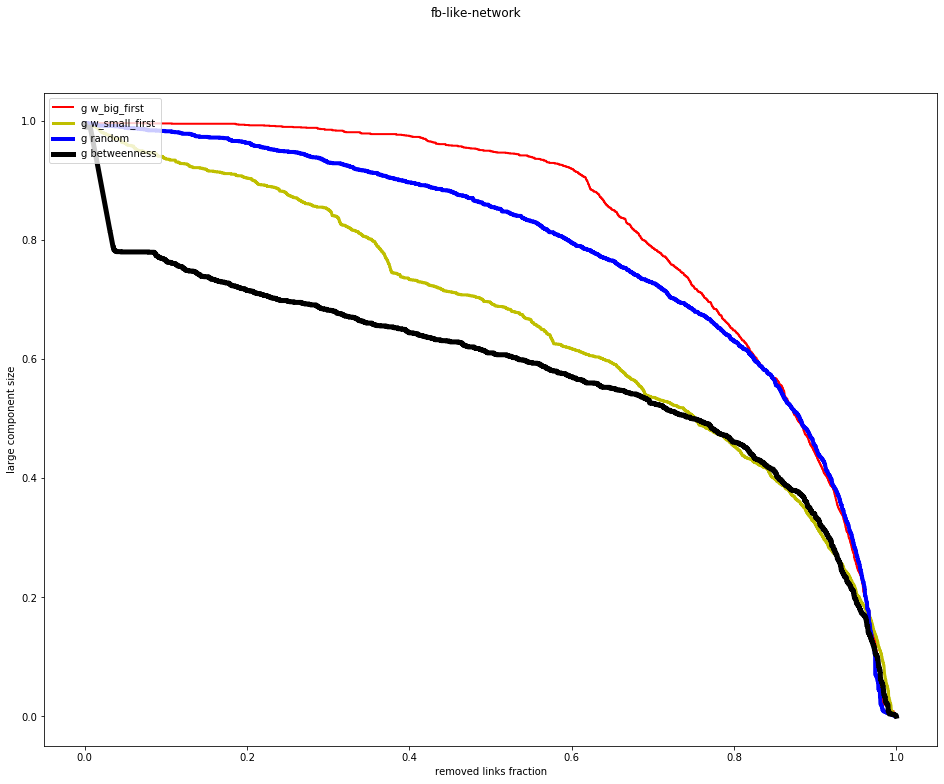

In [90]:
# Let's visualize the link removal
fig = run_link_removal(network_path, network_name)
fig.savefig("./fb_like_error_and_attack_tolerance.pdf")

Based on the plots, **answer** following questions:
### b. Vulnerability
For which of the four approaches is the network most and least vulnerable? In other words, in which case does the giant component shrink fastest / slowest? Or is this even simple to define?
### c. Integrity
When comparing the removal of links in ascending and descending order strong and weak links first, which ones are more important for the integrity of the network? Why do you think this would be the case?
### d. Comparison
How would you explain the difference between the random removal strategy and the removal in descending order of edge betweenness strategy?